In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import os
from urllib.request import urlretrieve
import pandas as pd


URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL):
    if not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East']
    return data

### Load the Data

In [3]:
data = get_fremont_data()

In [4]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [5]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


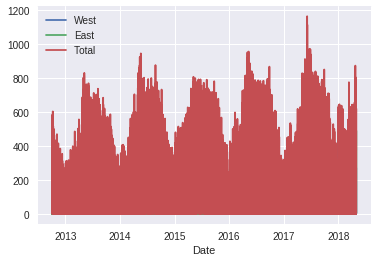

In [6]:
data.plot()

We can see  that this is really dense, all data point over the course of 5 years. to see it better we can resample say over the weekly data.

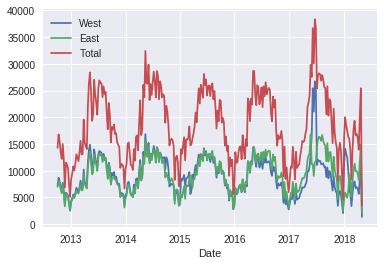

In [7]:
data.resample('W').sum().plot();

Lets change the default matplotlib style.

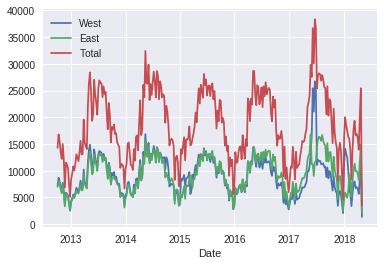

In [8]:
data.resample('W').sum().plot();

Lets reduce the length of the data legends

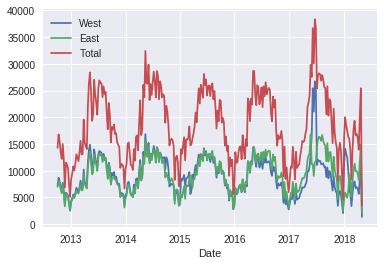

In [9]:
data.resample('W').sum().plot();

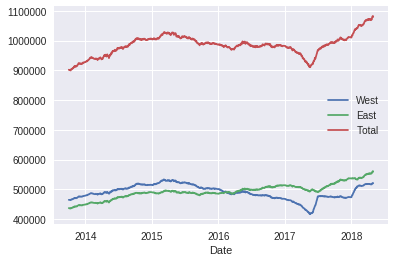

In [10]:
data.resample('D').sum().rolling(365).sum().plot();

(0, 1114778.25)

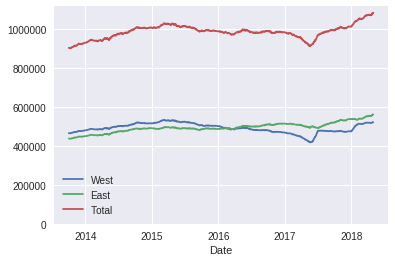

In [11]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)

(0, 1114778.25)

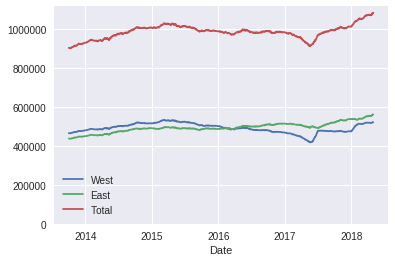

In [12]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)

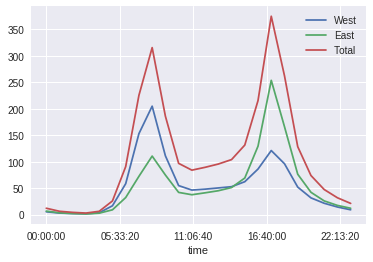

In [13]:
data.groupby(data.index.time).mean().plot()

In [14]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, -5:]

,2018-04-26,2018-04-27,2018-04-28,2018-04-29,2018-04-30
00:00:00,12.0,18.0,16.0,20.0,2.0
01:00:00,5.0,10.0,6.0,8.0,2.0
02:00:00,1.0,0.0,3.0,7.0,4.0
03:00:00,2.0,4.0,2.0,1.0,2.0
04:00:00,8.0,9.0,2.0,3.0,7.0


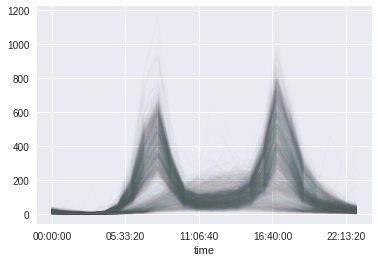

In [15]:
pivoted.plot(legend=False, alpha=0.01)